# Assignment 4

Suggested due date : 7th November 2018

## Q-learning on Frozen Lake with OpenAI Gym

The aims for this assignment are:
* Get familiar with OpenAI Gym and more particularly the FrozenLake environment.
* Implement the tabular Q-learning algorithm

## OpenAI Gym

For the purpose of focusing on the algorithms, we will use standard environments provided by the OpenAI Gym suite. OpenAI Gym provides controllable environments (see <a href="https://gym.openai.com/envs/">here</a> and <a href="https://gym.openai.com/docs/">docs here</a>) for research in reinforcement learning.
We will use a simple toy problem to illustrate reinforcement learning algorithms properties. Especially, we will try to solve the FrozenLake-v0 environment (see <a href="https://gym.openai.com/envs/FrozenLake-v0">here</a>).

To get used to the OpenAI Gym suite, we will first try to load an environment and apply random actions to it. Once you have instantiated your environment, the most important command is the **env.step(action)** one.
It applies the selected action to the environment and returns an observation (next state), a reward, a flag that is set to True if the episode has terminated, and some debug info.
Try to use a different policy (for instance, a constant action) to understand the role of that command.

Notice that the FrozenLake-v0 environment is non-deterministic (you can think of it as a slippery, or stochastic, GridWorld ) and you can’t compute the transition probabilities easily. This is why we will use reinforcement learning.

OpenAI considers the task solved if your success rate is over 76%.

## Q-learning

Note that since we are not using function approximation for this tabular problem.
Q-learning is based on an online update of the action-value function

<a href="https://www.codecogs.com/eqnedit.php?latex=Q_{t&plus;1}(s_t,a_t)&space;\leftarrow&space;Q_{t}(s_t,&space;a_t)&space;&plus;&space;\alpha&space;\Big(&space;r_t&space;&plus;&space;\gamma&space;\cdot&space;\underset{b}{\max}&space;Q_{t}(s_{t&plus;1},b)&space;-&space;Q_{t}(s_t,a_t)&space;\Big)" target="_blank"><img src="https://latex.codecogs.com/gif.latex?Q_{t&plus;1}(s_t,a_t)&space;\leftarrow&space;Q_{t}(s_t,&space;a_t)&space;&plus;&space;\alpha&space;\Big(&space;r_t&space;&plus;&space;\gamma&space;\cdot&space;\underset{b}{\max}&space;Q_{t}(s_{t&plus;1},b)&space;-&space;Q_{t}(s_t,a_t)&space;\Big)" title="Q_{t+1}(s_t,a_t) \leftarrow Q_{t}(s_t, a_t) + \alpha \Big( r_t + \gamma \cdot \underset{b}{\max} Q_{t}(s_{t+1},b) - Q_{t}(s_t,a_t) \Big)" /></a>

where alpha is a learning rate, and gamma a discount factor (we recommend values of 0.1 and 0.99 here respectively).
Most of the time, Q-learning is implemented with an epsilon-greedy exploration strategy ; this means selecting a random action (exploring) with probability epsilon, and selecting the best action with probability 1-epsilon.

To this end:

* Define a Q-table of the correct size to host the Q-function estimate (initialized randomly).
* Implement the Q-learning algorithm with epsilon-greedy - try several constant values, from 0.5 to 0.1.
* Measure your success rate by counting the number of succesful trials on a sliding window of 100 episodes.
* Anneal your epsilon rate with time (ie schedule its decay to a very small value over time). **Observe how drastically this impacts performance**.
* Since the environment is stochastic, the correct evaluation involves measuring the quality of the algorithm on average, over a handful of trials. Use that as your measure.
* Try changing the update rule to the SARSA algorithm, which shares the same logic but with on-policy update rule

<a href="https://www.codecogs.com/eqnedit.php?latex=Q_{t&plus;1}(s_t,a_t)&space;\leftarrow&space;Q_{t}(s_t,&space;a_t)&space;&plus;&space;\alpha&space;\Big(&space;r_t&space;&plus;&space;\gamma&space;\cdot&space;Q_{t}(s_{t&plus;1},a_{t&plus;1})&space;-&space;Q_{t}(s_t,a_t)&space;\Big)" target="_blank"><img src="https://latex.codecogs.com/gif.latex?Q_{t&plus;1}(s_t,a_t)&space;\leftarrow&space;Q_{t}(s_t,&space;a_t)&space;&plus;&space;\alpha&space;\Big(&space;r_t&space;&plus;&space;\gamma&space;\cdot&space;Q_{t}(s_{t&plus;1},a_{t&plus;1})&space;-&space;Q_{t}(s_t,a_t)&space;\Big)" title="Q_{t+1}(s_t,a_t) \leftarrow Q_{t}(s_t, a_t) + \alpha \Big( r_t + \gamma \cdot Q_{t}(s_{t+1},a_{t+1}) - Q_{t}(s_t,a_t) \Big)" /></a>

Compare performance you obtain that way.
* Bonus : Additionally, you are encouraged to move all your logic to TensorFlow once you have completed the assignment. You can then instantiate a new environment such as Atari games, and pick a function approximator of your choice to see how convergence goes (see the Nature DQN paper for implementation details).


In [2]:
# Try out this whole envrionment thingy
import gym
env = gym.make("FrozenLake-v0")

In [3]:
print(env.observation_space, env.action_space)

Discrete(16) Discrete(4)


In [4]:
# Build our little Q-Tabel
import torch
import random as rand

q_table = torch.rand(16, 4) # uniform random [0,1]
rewards = []

def update(s, new_s, a, r, lr=0.1, gamma=0.99):
    global q_table
    q_table[s][a] += lr * (r + gamma * q_table[new_s][torch.argmax(q_table[new_s])] - q_table[s][a] )

def policy(s, epsilon=0.3):
    return rand.randint(0, 3) if rand.random() < epsilon else torch.argmax(q_table[s]).item()

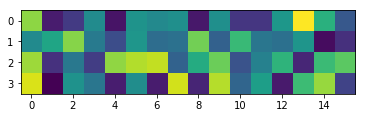

In [6]:
# Graph the Q-Table
import matplotlib.pyplot as plt
plt.imshow(q_table.t())
plt.show()

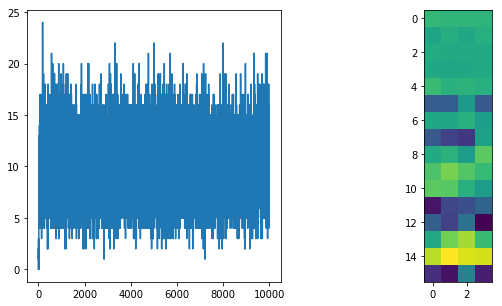

DONE!


In [7]:
# Train our Q-Table
from IPython.display import clear_output

epsilon = 0.4
ep = 0
while ep < 1e6:
    r = 0.
    done = False
    s = env.reset()
    while not done:
        action = policy(s, epsilon)
        state, reward, done, _ = env.step(action)
        r += reward
        update(s, state, action, reward)
        s = state
    if ep % 100 == 0:
        _, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].plot(rewards)
        ax[1].imshow(q_table)
        plt.show()
        print(epsilon, "({:.2f}% complete)".format(ep/1e4))
        clear_output(wait=True)
        rewards.append(r)
    else:
        rewards[-1] += r
    ep += 1

_, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(rewards)
ax[1].imshow(q_table)
plt.show()
print("DONE!")

In [14]:
# Test the tabel by playing 1000 games
wins = 0
games = 1000
for eps in range(games):
    done = False
    s = env.reset()
    while not done:
        s, r, done, _ = env.step(policy(s, 0))
        wins += r
print("Wins {:.2f}%".format(wins/games*100))

Wins 75.00%


## Try on-policy update method

In [242]:
# On policy q-table

q_table_op = torch.rand(16, 4) # uniform random [0,1]
rewards_op = []

def update_op(s, new_s, a, new_a, r, lr=0.1, gamma=0.99):
    global q_table_op
    q_table_op[s][a] += lr * (r + gamma * q_table_op[new_s][new_a] - q_table_op[s][a])
    
def policy_op(s, epsilon=0.3):
    return rand.randint(0, 3) if rand.random() < epsilon else torch.argmax(q_table_op[s]).item()

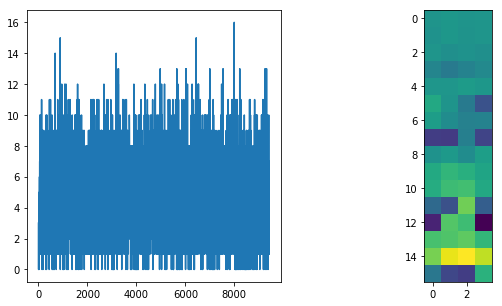

DONE!


In [255]:
# Train our Q-Table

epsilon_op = 0.4
ep = 0
while ep < 1e6:
    r = 0.
    done = False
    s = env.reset()
    while not done:
        action = policy_op(s, epsilon)
        state, reward, done, _ = env.step(action)
        r += reward
        update_op(s, state, action, policy_op(state, epsilon), reward)
        s = state
    if ep % 100 == 0:
        _, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].plot(rewards_op)
        ax[1].imshow(q_table_op)
        plt.show()
        print(epsilon_op, "({:.2f}% complete)".format(ep/1e4))
        clear_output(wait=True)
        rewards_op.append(r)
    else:
        rewards_op[-1] += r
    ep += 1

_, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(rewards_op)
ax[1].imshow(q_table_op)
plt.show()
print("DONE!")

In [259]:
# Test the tabel by playing 1000 games
wins = 0
for eps in range(5000):
    done = False
    s = env.reset()
    while not done:
        s, r, done, _ = env.step(policy_op(s, 0))
        wins += r
print("Wins {:.2f}%".format(wins/5e3*100))

Wins 7.04%


## Compare resulting q-tables

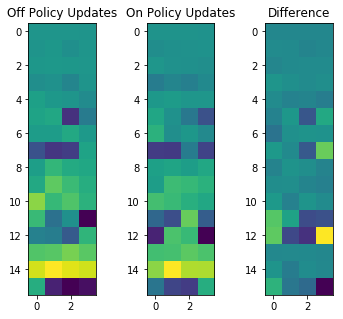

In [251]:
_, ax = plt.subplots(1, 3, figsize=(6, 5))
ax[0].imshow(q_table)
ax[0].set_title("Off Policy Updates")
ax[1].imshow(q_table_op)
ax[1].set_title("On Policy Updates")

ax[2].imshow(q_table - q_table_op)
ax[2].set_title("Difference")

plt.show()

## Try Q Learning on a more complex task with fn approximation

In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import random as rand

In [71]:
# Build a model that predicts the Q values for each possible action

class Model(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 4)
        )
        
    def forward(self, state):
        return self.model(state)

In [72]:
# Loss function that computes the bellman loss
# Note: exp_n = (state_n, reward_n, action_n)
def bellman_loss(model, exp_1, exp_2, gamma=0.99):
    q_a_1 = model(exp_1[0].unsqueeze(0)).squeeze()[exp_1[2]]
    q_a_2 = torch.max(model(exp_2[0].unsqueeze(0)))
    return (exp_2[1] + gamma * q_a_2 - q_a_1)**2

def one_hot(idx):
    res = torch.zeros(16)
    res[idx] = 1
    return res

def shuffle(length):
    idx = [i for i in range(length-1)]
    rand.shuffle(idx)
    return idx

In [78]:
# Instantiate a model and optimizer
model = Model()
optim = torch.optim.SGD(model.parameters(), 1e-4)

In [79]:
losses = []
rewards = []

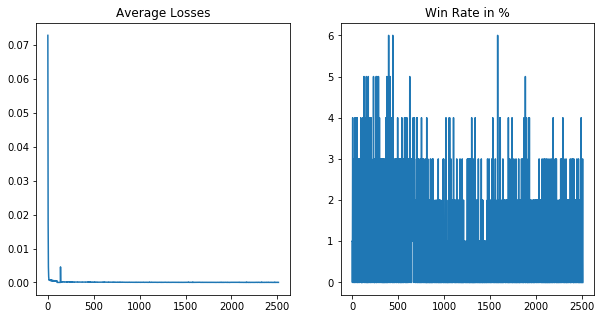

In [83]:
# Training loop: Gather experience, then train on the episodes in random order
epsilon_nn = 0.4
ep = 0
while ep < 1e5:
    ep += 1
    # Collect replay buffer
    replay = []
    rewards.append(0)
    with torch.no_grad():
        for _ in range(100):
            done = False
            state = one_hot(env.reset())
            reward = 0
            while not done:
                if rand.random() < epsilon_nn:
                    action = rand.randint(0, 3)
                else:
                    action = torch.argmax(model(state.unsqueeze(0)), dim=1).item()
                replay.append((state, reward, action))
                state, reward, done, _ = env.step(action)
                state = one_hot(state)
                rewards[-1] += reward
    # Update policy
    losses.append(0)
    for i in shuffle(len(replay)):
        optim.zero_grad()
        loss = bellman_loss(model, replay[i], replay[i+1])
        loss.backward()
        losses[-1] += loss.item()
        optim.step()
    losses[-1] /= len(replay)
    # Plot loss over time
    _, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(losses)
    ax[1].plot(rewards)
    ax[0].set_title("Average Losses")
    ax[1].set_title("Win Rate in %")
    plt.show()
    clear_output(wait=True)

In [103]:
# Test the model
wins = 0
for eps in range(100):
    done = False
    s = one_hot(env.reset())
    while not done:
        s, r, done, _ = env.step(torch.argmax(model(s.unsqueeze(0)), dim=1).item())
        wins += r
        s = one_hot(s)
print("Wins {:.2f}%".format(wins/5e3*100))

Wins 0.00%


Now it is time to rethink my life-choices ...